<a href="https://colab.research.google.com/github/j-will7378/Facebook_Camper_Survey/blob/main/Camper_Team_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Meta's Bootcamp is a 6-8 week program for new employees to onboard and select a team.During this time, employees do not do any actual work. Instead, they receive in-depth training on Meta technologies and best practices.
The bootcamp includes a bootcamp mentor to guide you through team selection. Participants are set up to matriculate through the program via in-depth training on Meta technologies and best practices.

We want to get a baseline measurement on what the camper experience. This inital measurement will allow for futire improvement of the program.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/content/Camper-Team-Selection-Survey - Sheet1.csv')

In [3]:
df.head()

,ResponseId,Q2_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q7_1,location_name
0,Response ID,"Overall, how satisfied or dissatisfied are you...",How satisfied or dissatisfied were you with th...,How satisfied or dissatisfied were you with th...,How satisfied or dissatisfied were you with th...,How satisfied or dissatisfied were you with th...,How satisfied or dissatisfied were you with th...,How satisfied or dissatisfied were you with th...,How satisfied or dissatisfied were you with th...,"Overall, how satisfied or dissatisfied are you...",NaN
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle
2,R_2QPyOR5eHkNN0sz,Extremely satisfied,Satisfied,Satisfied,Satisfied,Extremely satisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,US - NY - New York
3,R_3j73p3UKWrSXB8Y,Extremely satisfied,Extremely satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,US - CA - Menlo Park
4,R_xlKC5rPUZPpTNst,Satisfied,Extremely satisfied,Satisfied,Satisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,US - NY - New York


In [4]:
df.shape

(311, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ResponseId     306 non-null    object
 1   Q2_1           307 non-null    object
 2   Q6_1           226 non-null    object
 3   Q6_2           223 non-null    object
 4   Q6_3           225 non-null    object
 5   Q6_4           226 non-null    object
 6   Q6_5           223 non-null    object
 7   Q6_6           223 non-null    object
 8   Q6_7           220 non-null    object
 9   Q7_1           225 non-null    object
 10  location_name  305 non-null    object
dtypes: object(11)
memory usage: 26.9+ KB


In [6]:
df.describe(include= 'all')

,ResponseId,Q2_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q7_1,location_name
count,306,307,226,223,225,226,223,223,220,225,305
unique,306,7,8,8,8,8,8,6,6,8,13
top,Response ID,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,US - CA - Menlo Park
freq,1,167,108,119,92,96,100,100,88,132,137


# Observation
- The top response for al questions is satisfied.
- This indicates the campers are satisfied with their experience regardless of location.

In [7]:
# get rid of the row with the actuall questions. This row dooes us no good as far as analysis
df.drop(0, inplace= True)

In [8]:
df.head()

,ResponseId,Q2_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q7_1,location_name
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle
2,R_2QPyOR5eHkNN0sz,Extremely satisfied,Satisfied,Satisfied,Satisfied,Extremely satisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,US - NY - New York
3,R_3j73p3UKWrSXB8Y,Extremely satisfied,Extremely satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,US - CA - Menlo Park
4,R_xlKC5rPUZPpTNst,Satisfied,Extremely satisfied,Satisfied,Satisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,US - NY - New York
5,R_BtCFuMgUHMM4c6t,Satisfied,Satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely satisfied,Neither satisfied nor dissatisfied,US - CA - Menlo Park


In [9]:
df.describe(include= 'all')

,ResponseId,Q2_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q7_1,location_name
count,305,306,225,222,224,225,222,222,219,224,305
unique,305,6,7,7,7,7,7,5,5,7,13
top,R_DNWoN4o4hkpgntL,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,US - CA - Menlo Park
freq,1,167,108,119,92,96,100,100,88,132,137


In [10]:
# need to create a new column of campers in menlo park and campers who are not in menlo park
# campers who are not in meno park will be counteed as non-menlo park regardless of where they are

def menloPark_nonMenloPark(location):
  for i in df['location_name']:
    if location == 'US - CA - Menlo Park':
      return 'menlo park'
    else:
      return 'non-menlo park'

df['menloPark/non-menloPark'] = df['location_name'].apply(menloPark_nonMenloPark)

In [11]:
df.head()

,ResponseId,Q2_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q7_1,location_name,menloPark/non-menloPark
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle,non-menlo park
2,R_2QPyOR5eHkNN0sz,Extremely satisfied,Satisfied,Satisfied,Satisfied,Extremely satisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,US - NY - New York,non-menlo park
3,R_3j73p3UKWrSXB8Y,Extremely satisfied,Extremely satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,US - CA - Menlo Park,menlo park
4,R_xlKC5rPUZPpTNst,Satisfied,Extremely satisfied,Satisfied,Satisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,US - NY - New York,non-menlo park
5,R_BtCFuMgUHMM4c6t,Satisfied,Satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely satisfied,Neither satisfied nor dissatisfied,US - CA - Menlo Park,menlo park


In [12]:
df['menloPark/non-menloPark'].describe(include= 'all')

count                310
unique                 2
top       non-menlo park
freq                 173
Name: menloPark/non-menloPark, dtype: object

In [13]:
df['menloPark/non-menloPark'].value_counts()

non-menlo park    173
menlo park        137
Name: menloPark/non-menloPark, dtype: int64

In [14]:
# need to get rid of all the null values
df.dropna(inplace= True)
df.shape

(213, 12)

## Exploratory data anlysis

In [15]:
# frequency distribution
# Count the frequency of each category
def frequency_distribution(qauestion):
  category_counts = df[qauestion].value_counts()

  # Calculate the total number of observations
  total = category_counts.sum()

  # Plot the bar chart
  plt.figure(figsize= (20, 10))
  barplot= sns.barplot(x=category_counts.index, y=category_counts.values)
  # Annotate each bar with the percentage
  for p in barplot.patches:
        height = p.get_height()
        barplot.text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:1.2f}%'.format((height / total) * 100), ha="center")

  plt.title('Frequency Distribution of Categories')
  plt.xlabel(qauestion)
  plt.ylabel('Frequency')
  plt.show()

In [16]:
frequency_distribution('Overall satisfaction with selection process')

KeyError: ignored

In [17]:
df.head(1)

,ResponseId,Q2_1,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q7_1,location_name,menloPark/non-menloPark
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle,non-menlo park


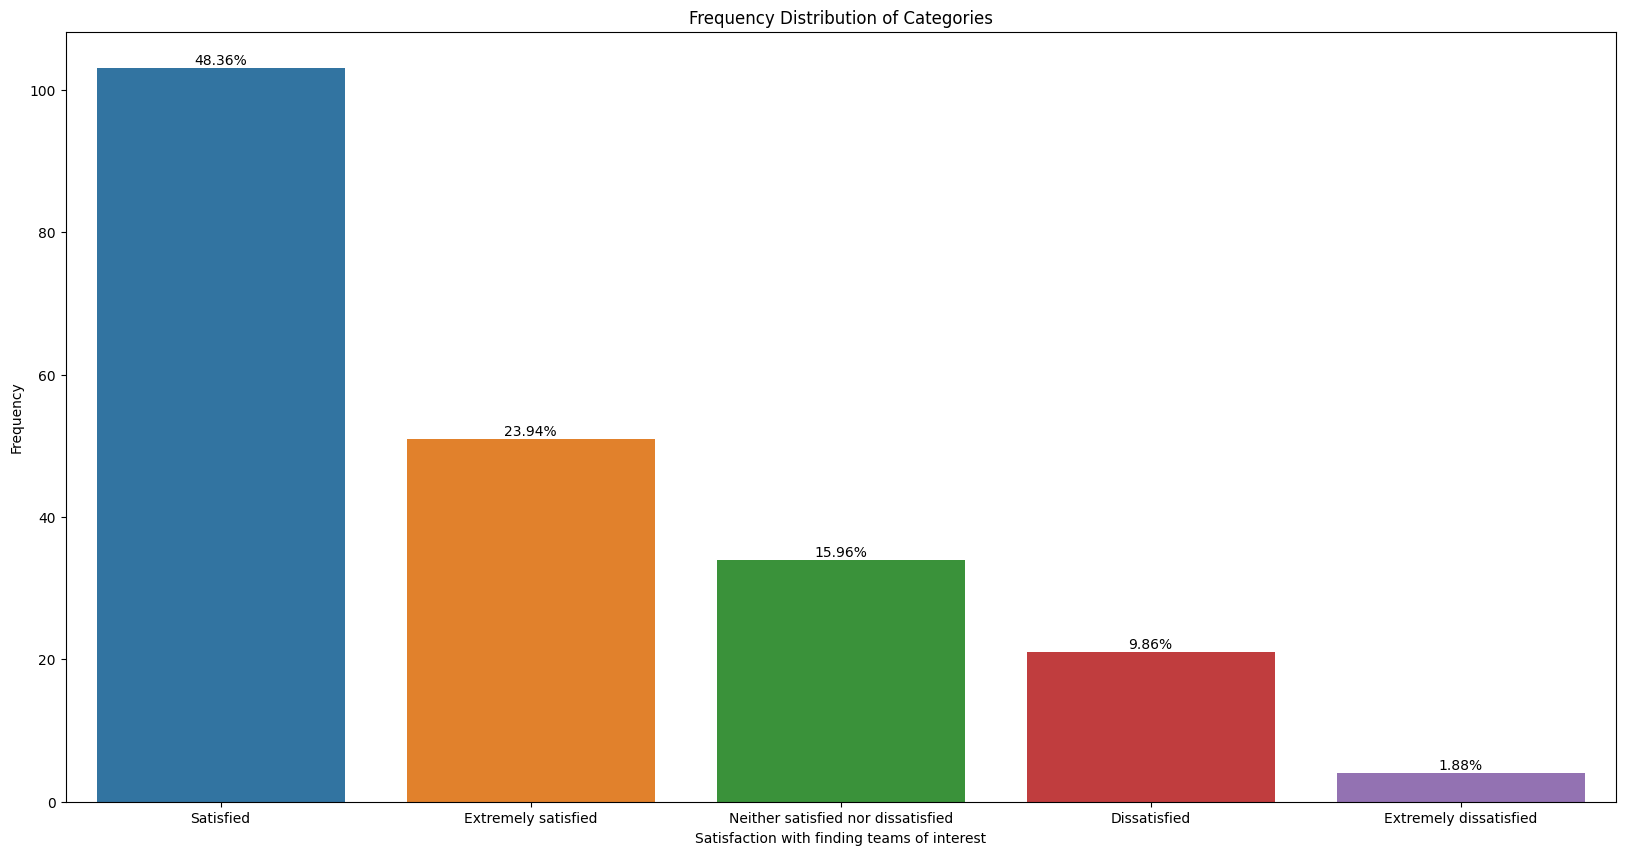

In [23]:
frequency_distribution('Satisfaction with finding teams of interest')

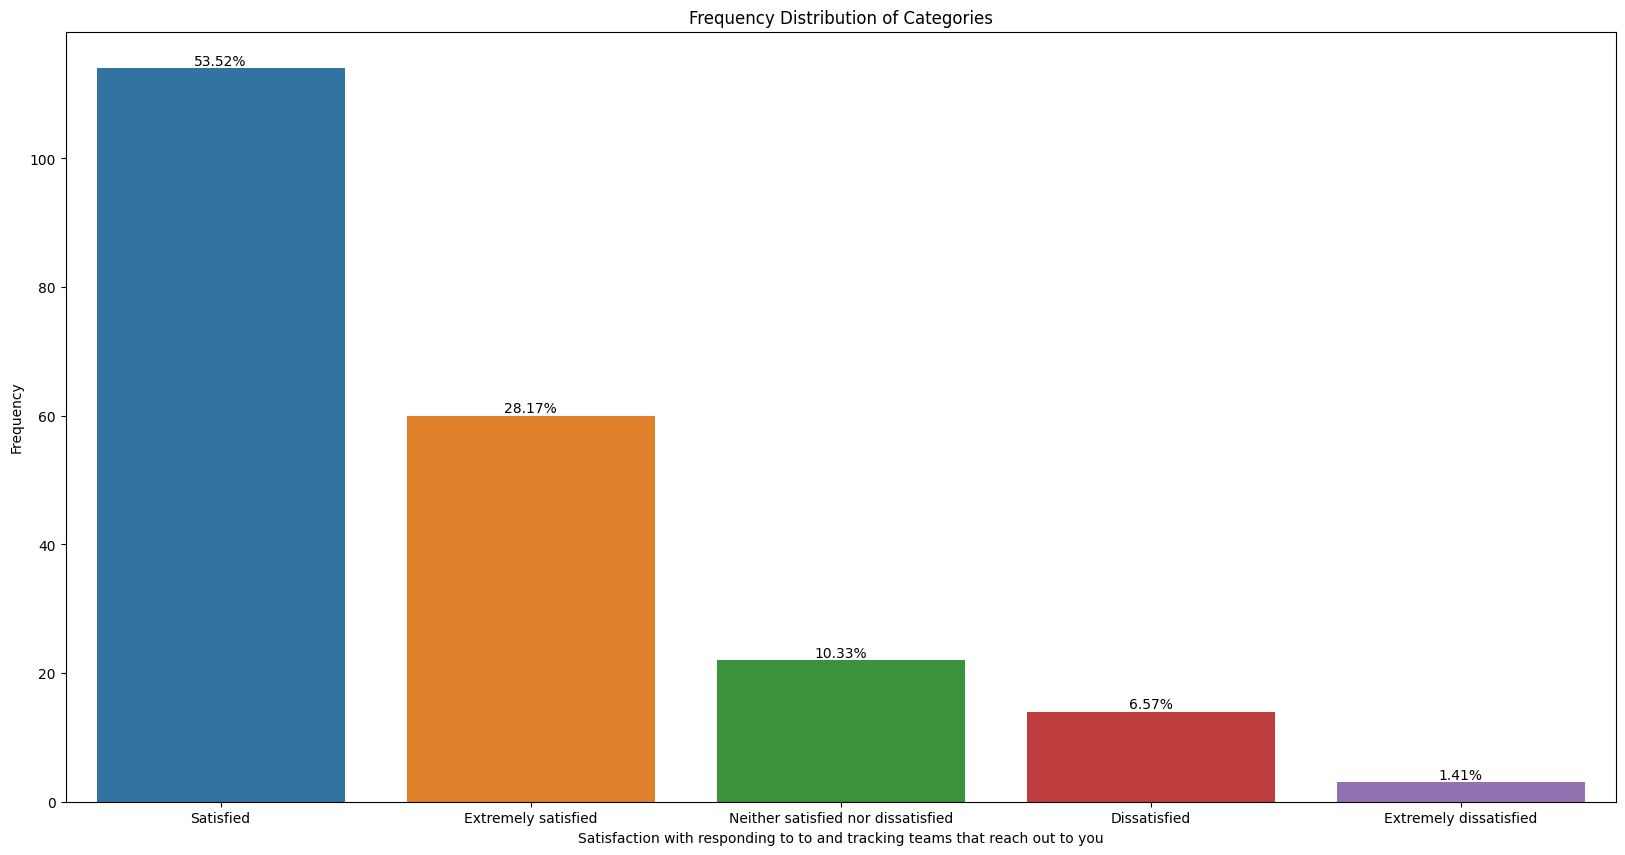

In [24]:
frequency_distribution('Satisfaction with responding to to and tracking teams that reach out to you')

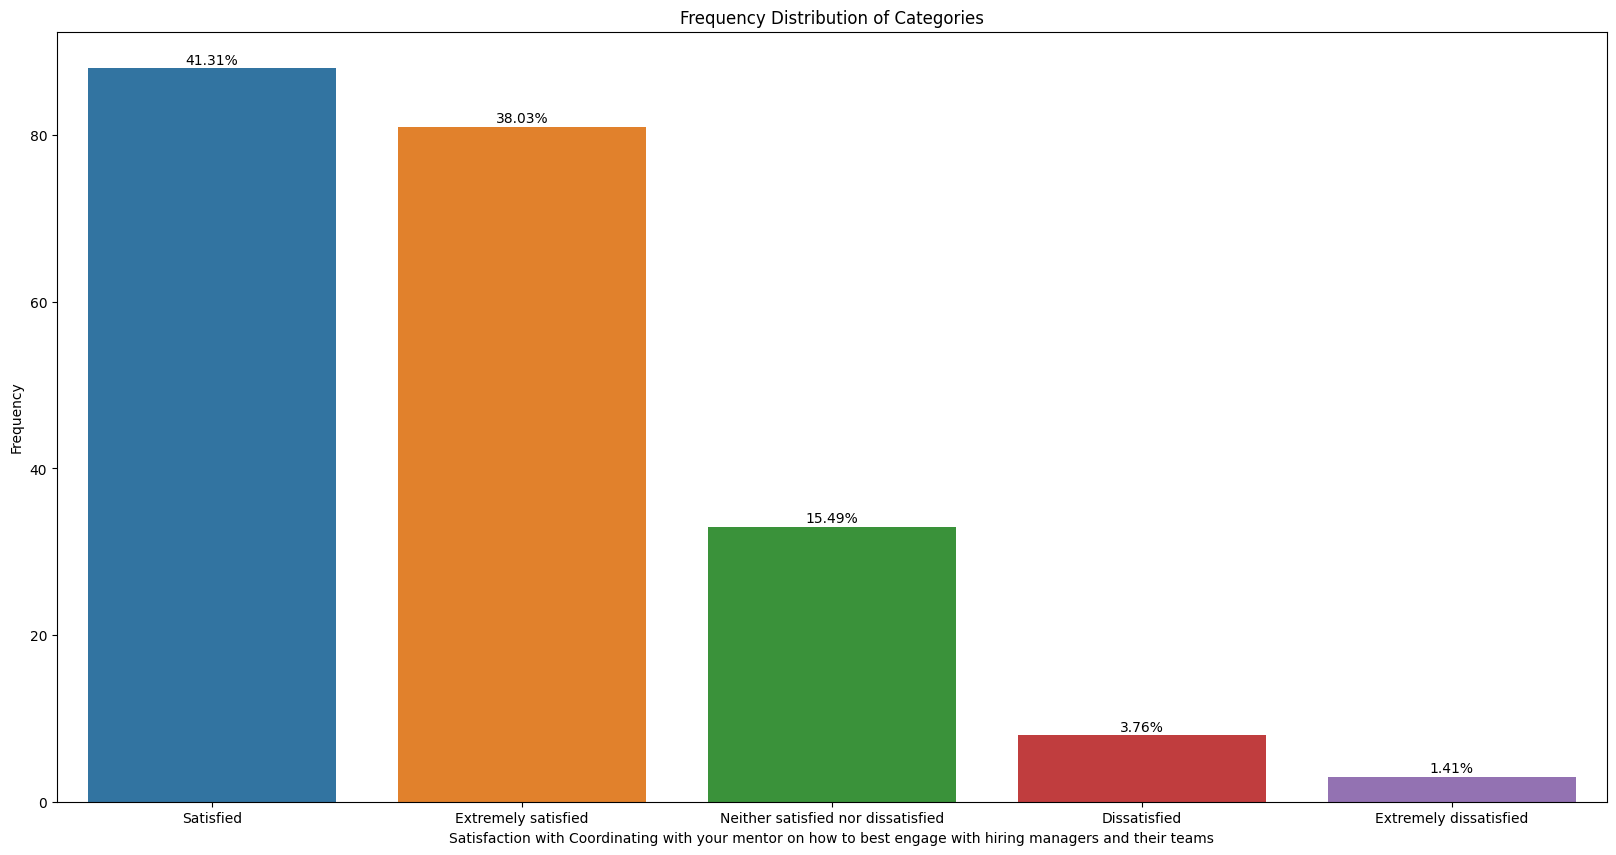

In [25]:
frequency_distribution('Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams')

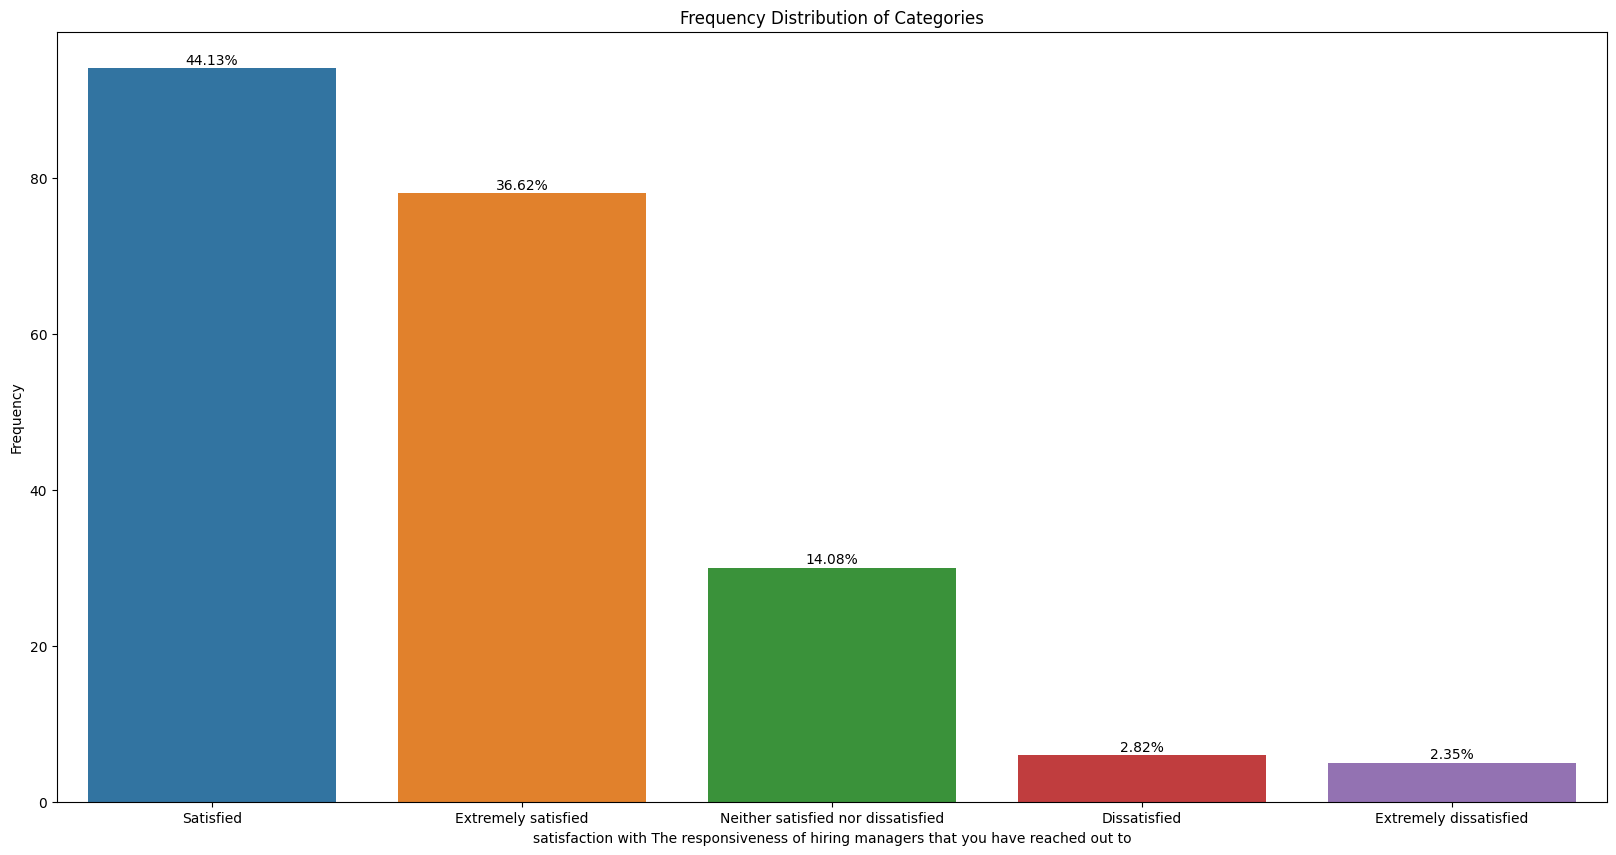

In [26]:
frequency_distribution('satisfaction with The responsiveness of hiring managers that you have reached out to')

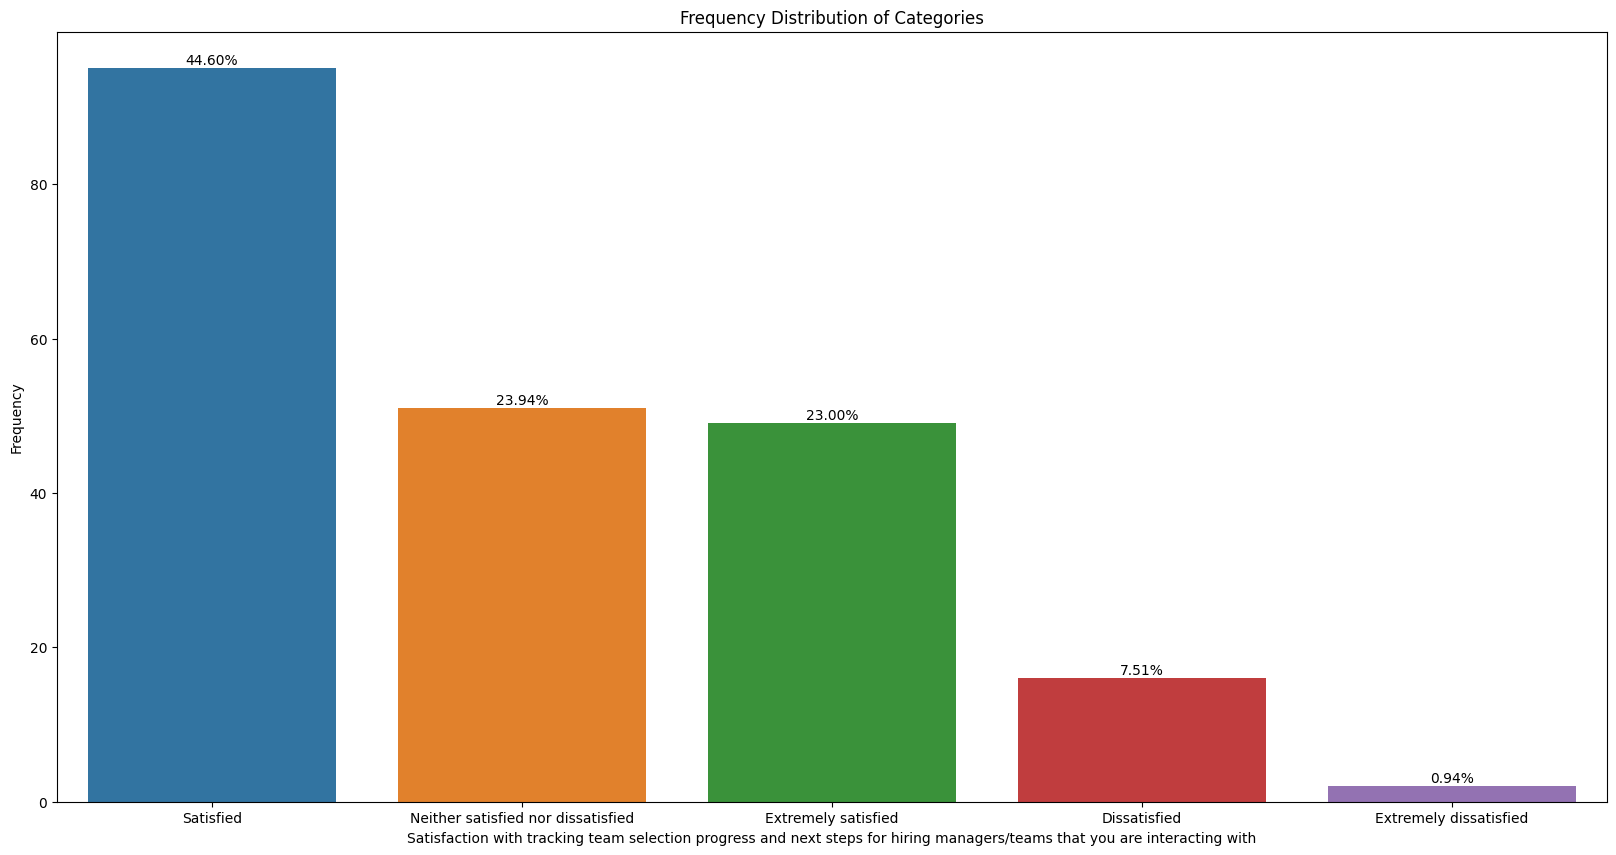

In [27]:
frequency_distribution('Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with')

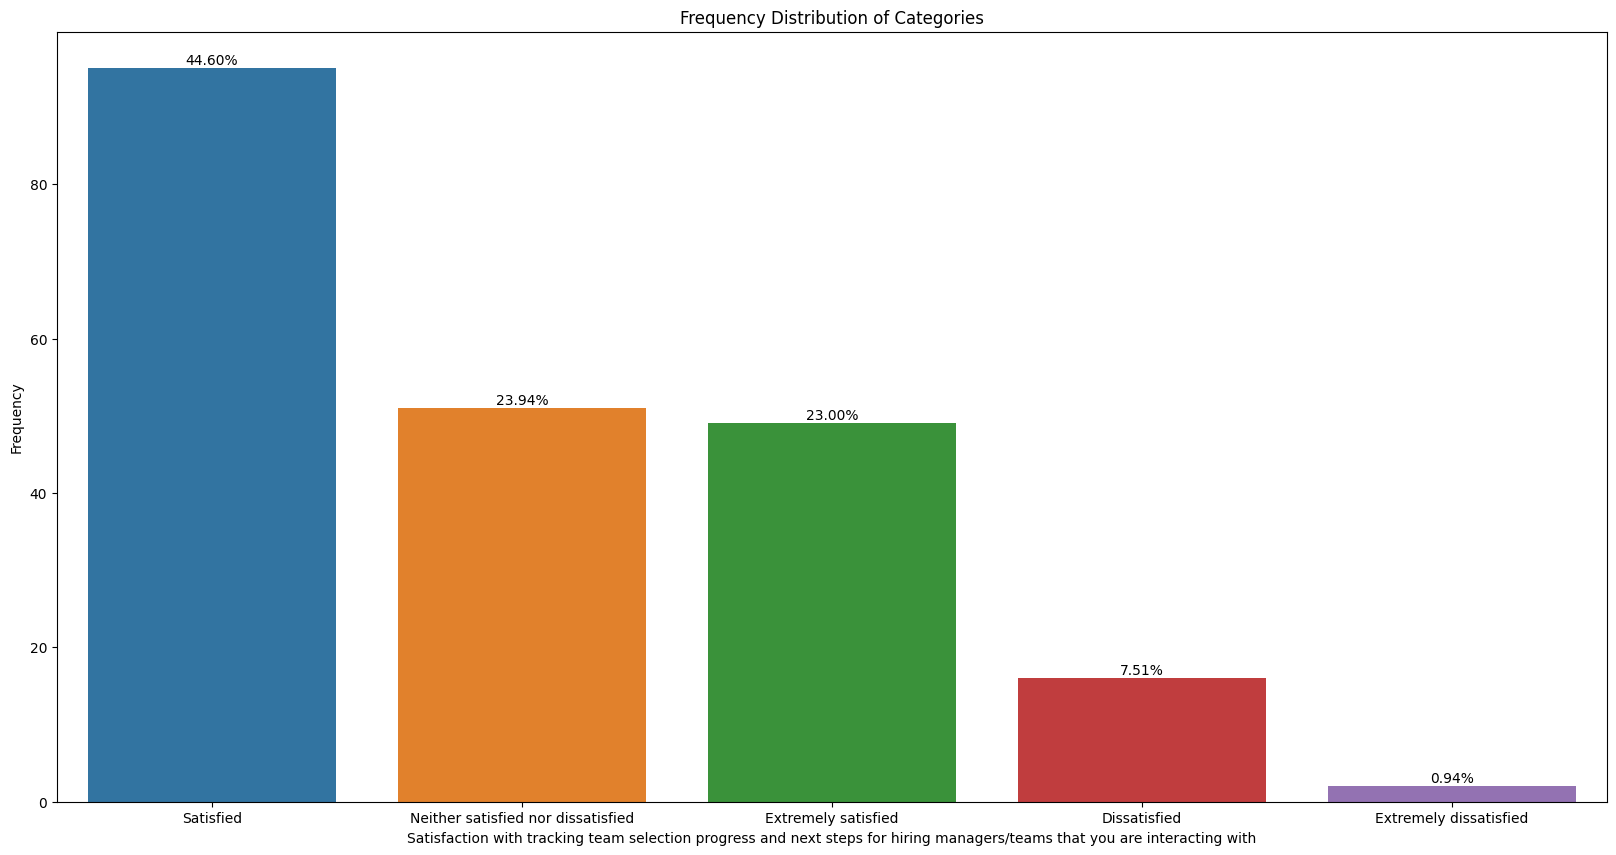

In [28]:
frequency_distribution('Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with')

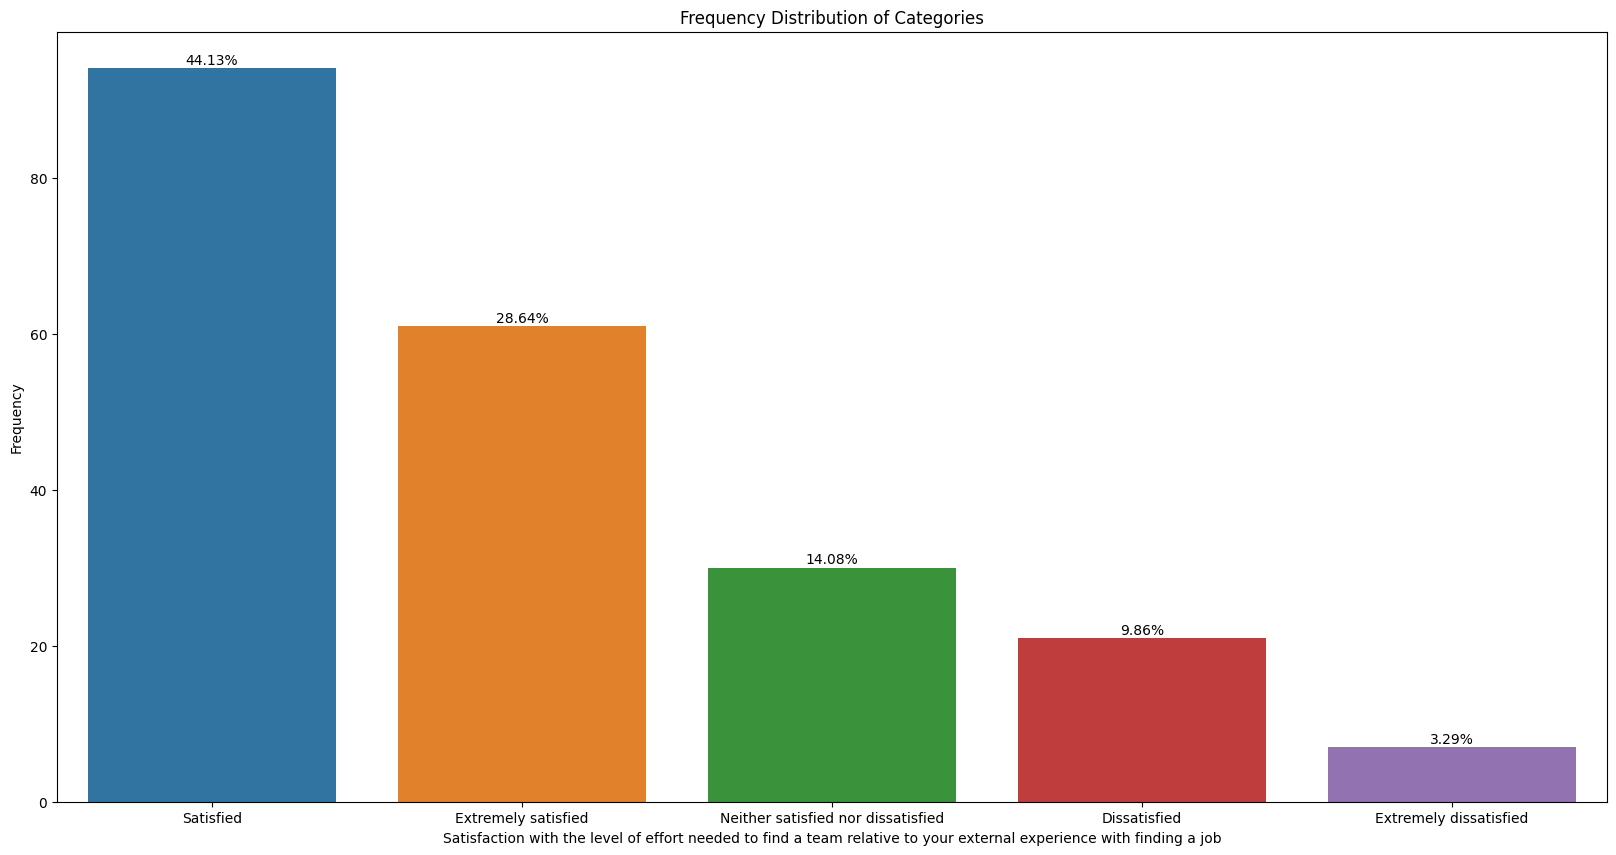

In [29]:
frequency_distribution('Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job')

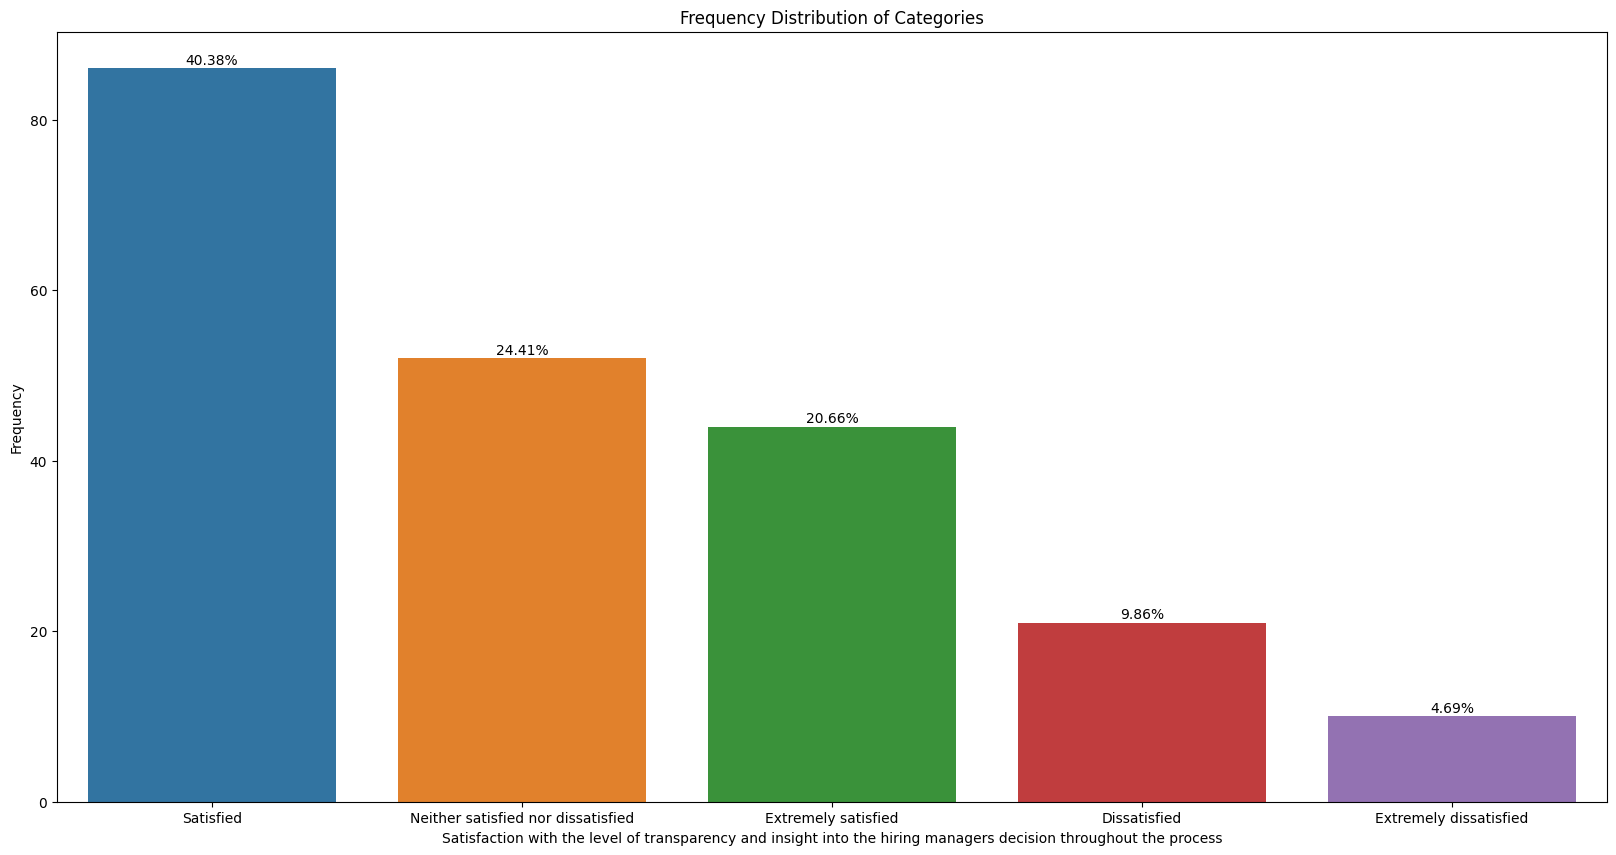

In [30]:
frequency_distribution('Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process')

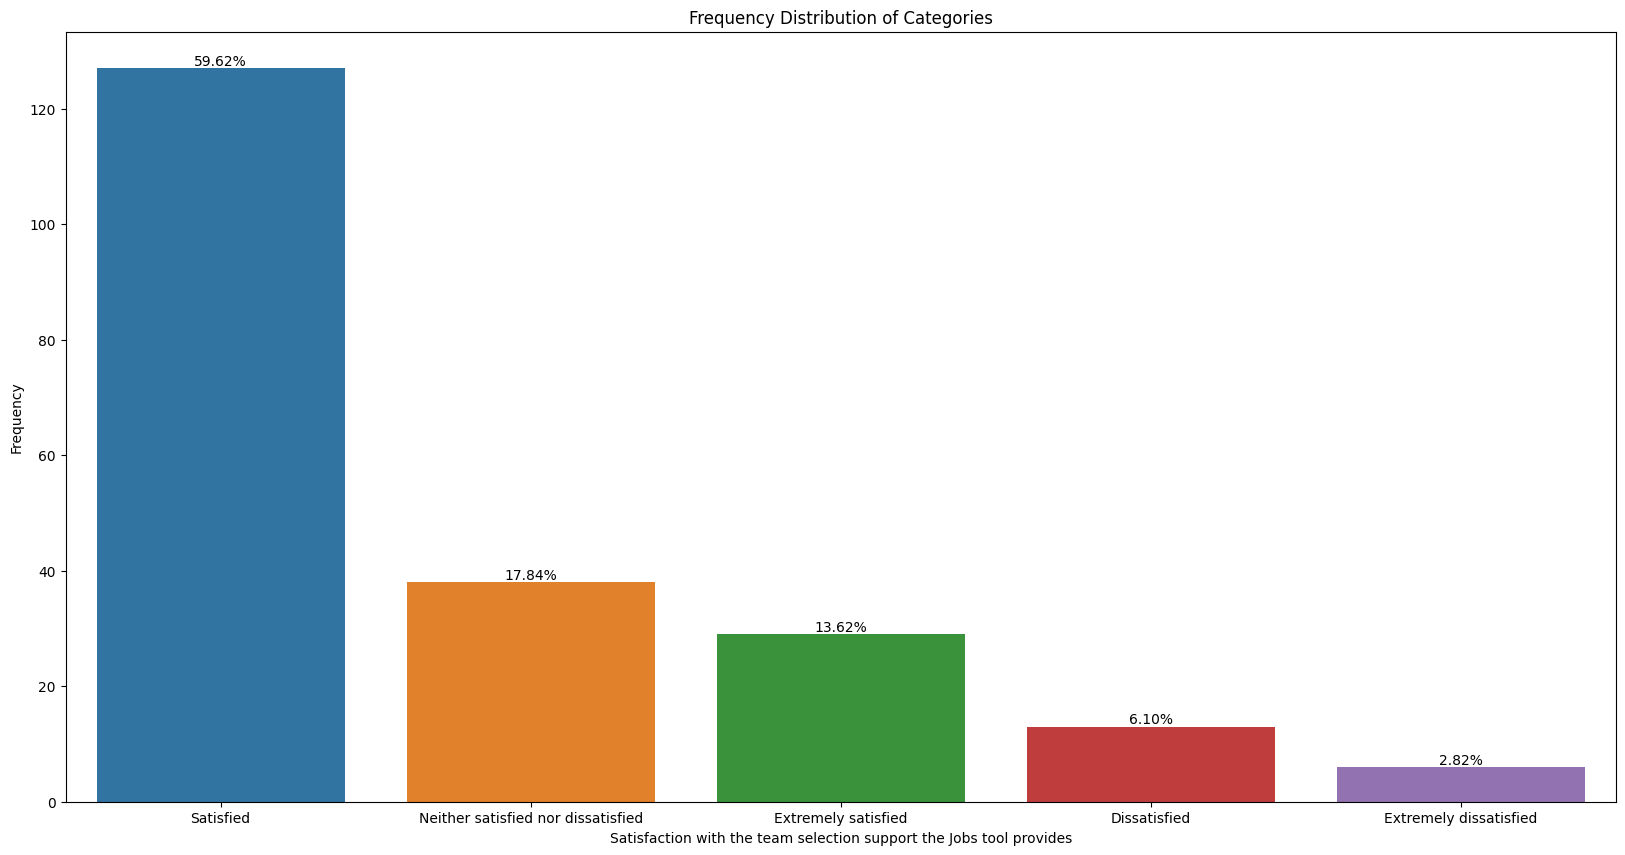

In [31]:
frequency_distribution('Satisfaction with the team selection support the Jobs tool provides')

In [32]:
df.head(1)

,ResponseId,Overall satisfaction with selection process,Satisfaction with finding teams of interest,Satisfaction with responding to to and tracking teams that reach out to you,Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams,satisfaction with The responsiveness of hiring managers that you have reached out to,Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with,Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job,Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process,Satisfaction with the team selection support the Jobs tool provides,location_name,menloPark/non-menloPark
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle,non-menlo park


In [21]:
# need to change to column lables for better comprehension of the data
df.rename(columns={'Q2_1': 'Overall satisfaction with selection process',
           'Q6_1': 'Satisfaction with finding teams of interest',
           'Q6_2': 'Satisfaction with responding to to and tracking teams that reach out to you',
           'Q6_3': 'Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams',
           'Q6_4': 'satisfaction with The responsiveness of hiring managers that you have reached out to',
           'Q6_5': 'Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with',
           'Q6_6': 'Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job',
           'Q6_7': 'Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process',
           'Q7_1': 'Satisfaction with the team selection support the Jobs tool provides'}, inplace= True)

In [22]:
df.head(1)

,ResponseId,Overall satisfaction with selection process,Satisfaction with finding teams of interest,Satisfaction with responding to to and tracking teams that reach out to you,Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams,satisfaction with The responsiveness of hiring managers that you have reached out to,Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with,Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job,Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process,Satisfaction with the team selection support the Jobs tool provides,location_name,menloPark/non-menloPark
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle,non-menlo park


In [35]:
# get frequency distribution with respect to location
# Plot the bar chart
def freq_dis_plot(question):
  plt.figure(figsize= (15, 7))
  ax= sns.countplot(
      data=df,
      x=question,
      hue='menloPark/non-menloPark',
  )
  # Calculate the total number of observations
  total = len(df)

  # Annotate each bar with the percentage
  for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.title('Frequency Distribution of Categories')
  plt.xlabel(question)
  plt.ylabel('Frequency')
  plt.show()

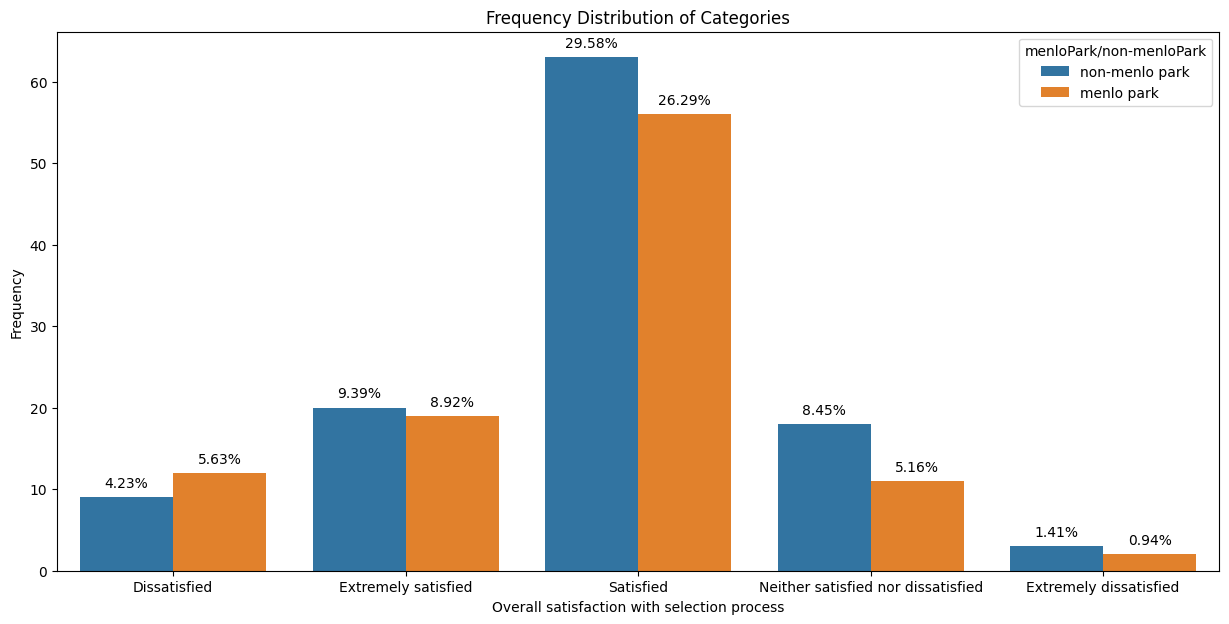

In [36]:
freq_dis_plot('Overall satisfaction with selection process')

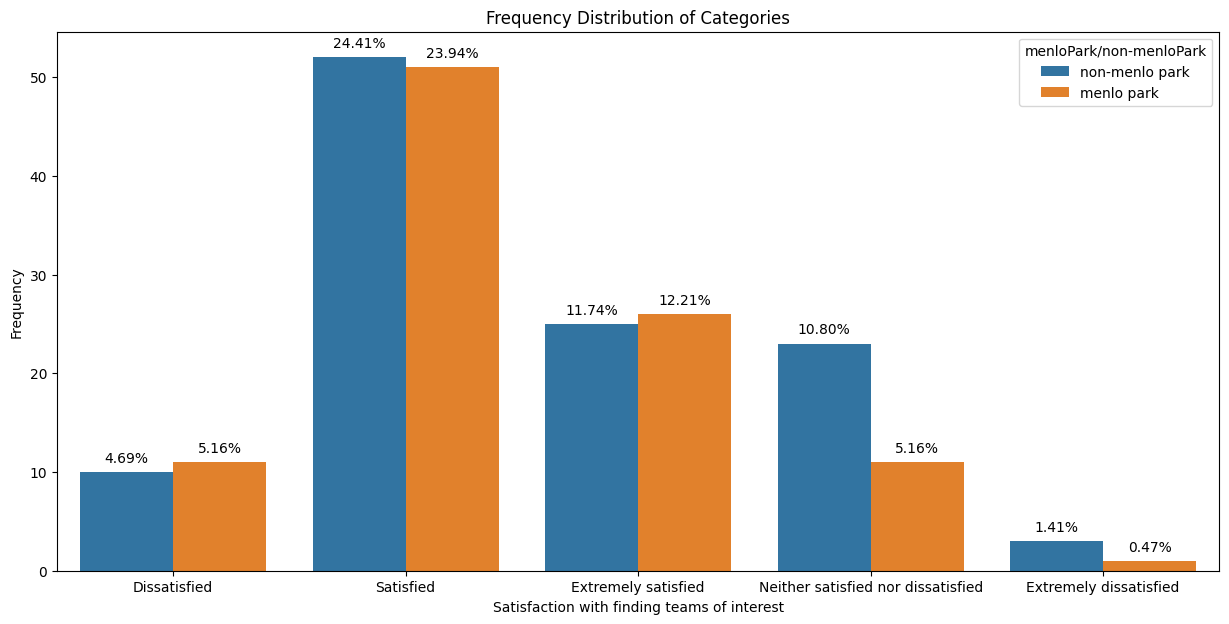

In [37]:
freq_dis_plot('Satisfaction with finding teams of interest')

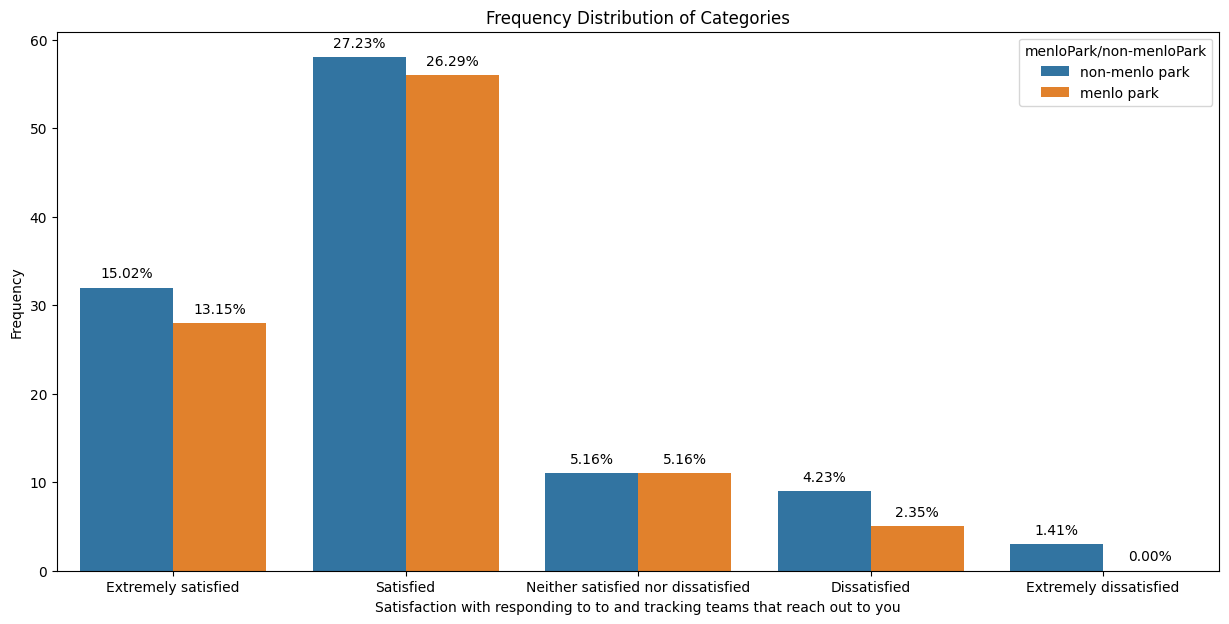

In [38]:
freq_dis_plot('Satisfaction with responding to to and tracking teams that reach out to you')

In [39]:
df.head()

,ResponseId,Overall satisfaction with selection process,Satisfaction with finding teams of interest,Satisfaction with responding to to and tracking teams that reach out to you,Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams,satisfaction with The responsiveness of hiring managers that you have reached out to,Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with,Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job,Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process,Satisfaction with the team selection support the Jobs tool provides,location_name,menloPark/non-menloPark
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle,non-menlo park
2,R_2QPyOR5eHkNN0sz,Extremely satisfied,Satisfied,Satisfied,Satisfied,Extremely satisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,US - NY - New York,non-menlo park
3,R_3j73p3UKWrSXB8Y,Extremely satisfied,Extremely satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,US - CA - Menlo Park,menlo park
4,R_xlKC5rPUZPpTNst,Satisfied,Extremely satisfied,Satisfied,Satisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,Neither satisfied nor dissatisfied,Satisfied,US - NY - New York,non-menlo park
5,R_BtCFuMgUHMM4c6t,Satisfied,Satisfied,Satisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely satisfied,Neither satisfied nor dissatisfied,US - CA - Menlo Park,menlo park


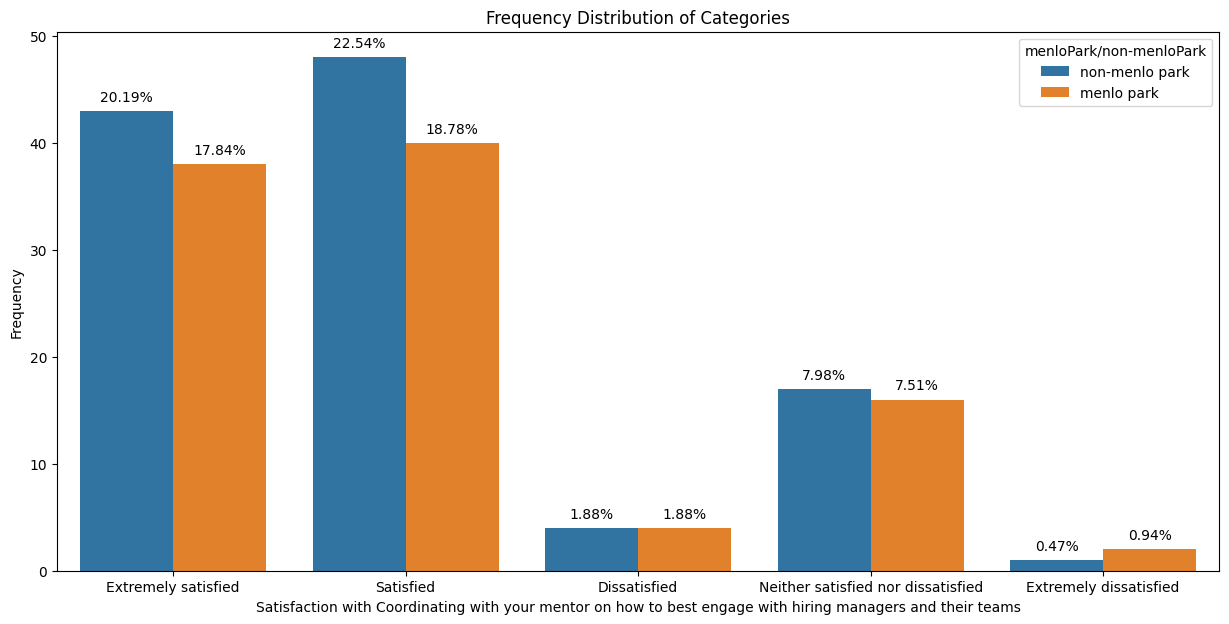

In [40]:
freq_dis_plot('Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams')

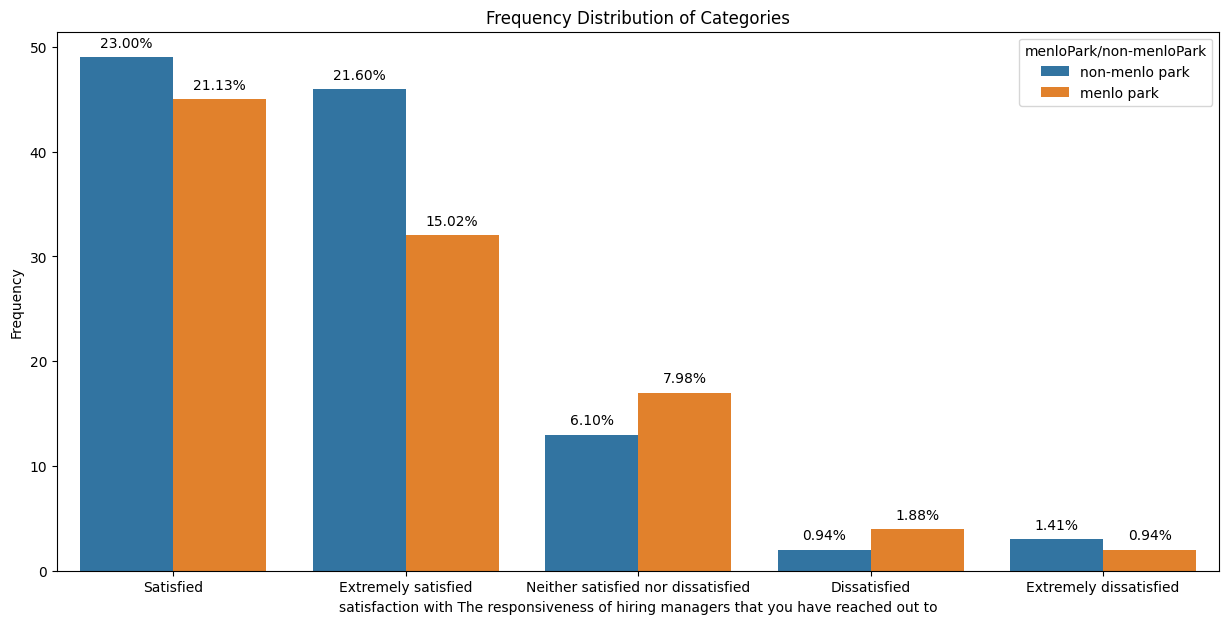

In [41]:
freq_dis_plot('satisfaction with The responsiveness of hiring managers that you have reached out to')

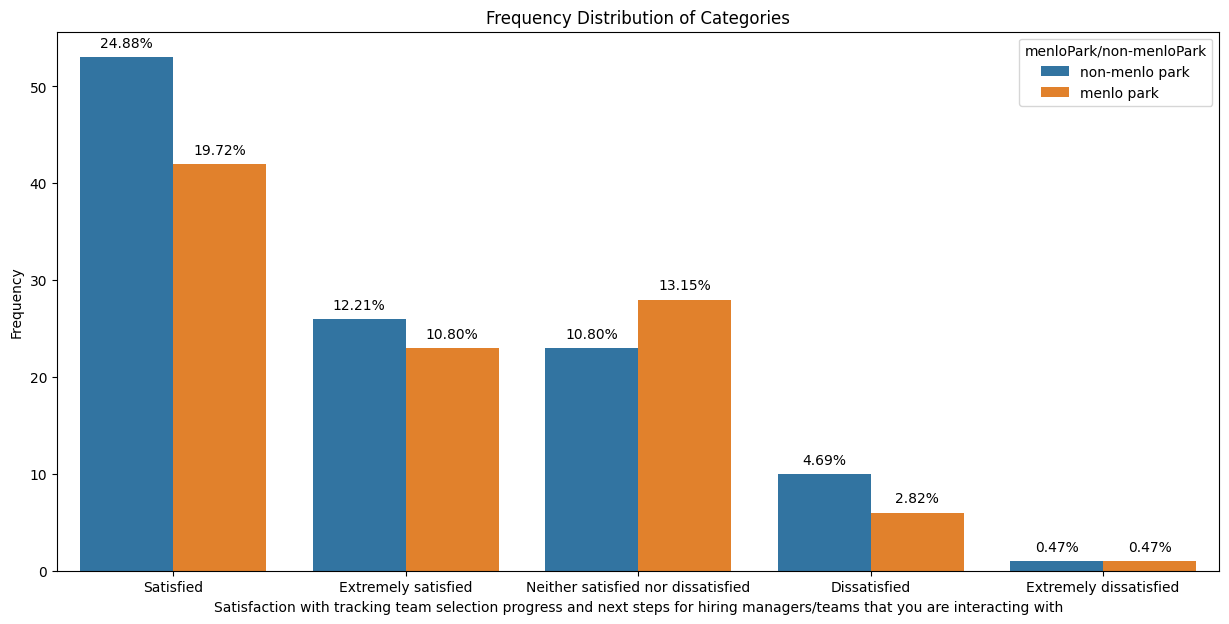

In [42]:
freq_dis_plot('Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with')

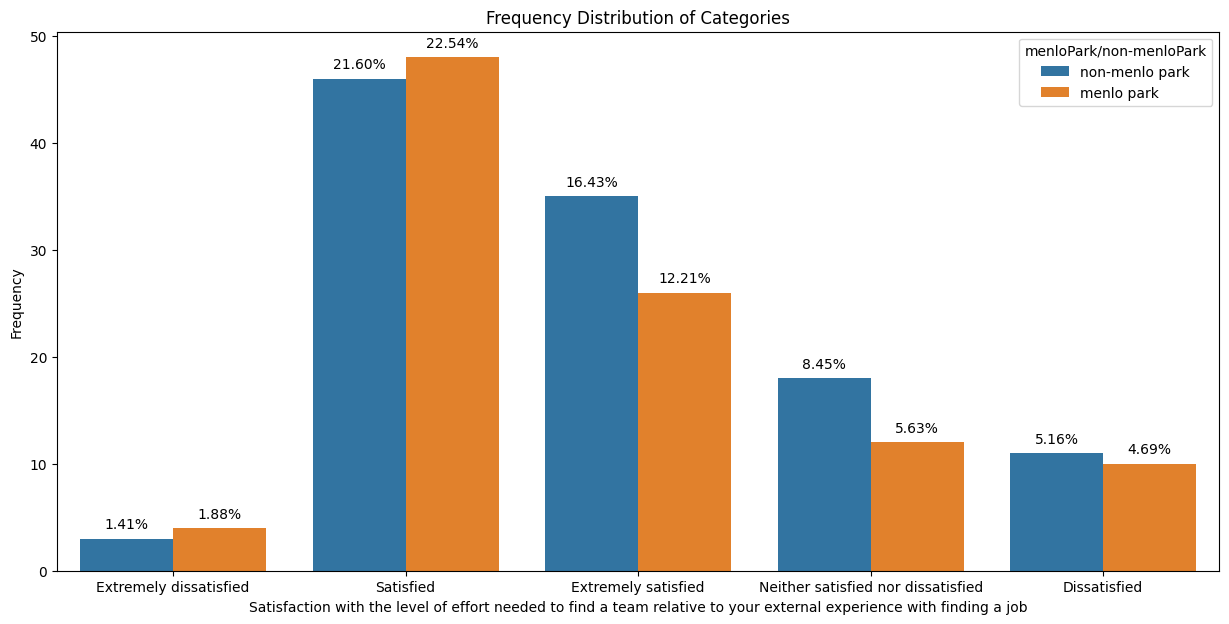

In [43]:
freq_dis_plot('Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job')

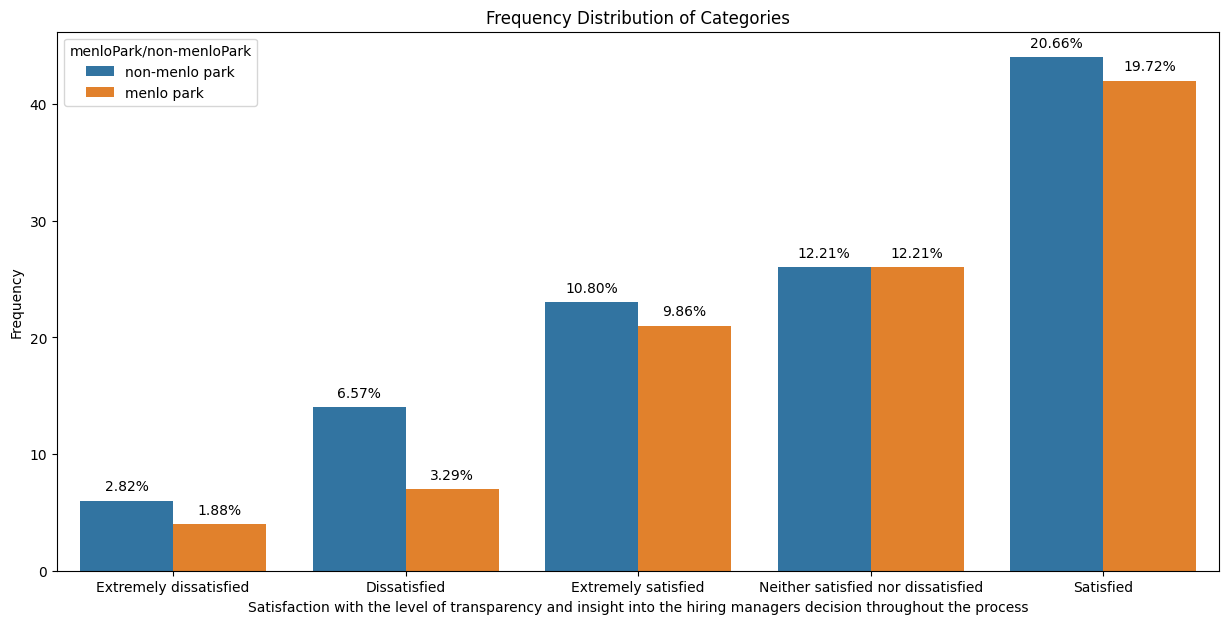

In [44]:
freq_dis_plot('Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process')

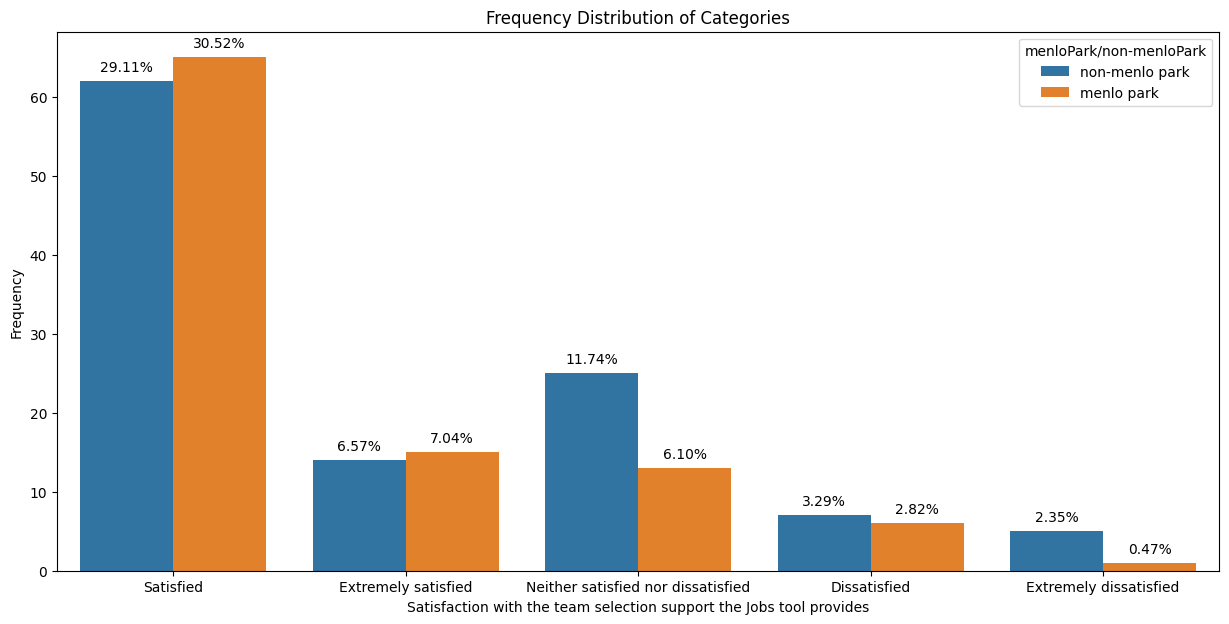

In [45]:
freq_dis_plot('Satisfaction with the team selection support the Jobs tool provides')

In [46]:
df.head(1)

,ResponseId,Overall satisfaction with selection process,Satisfaction with finding teams of interest,Satisfaction with responding to to and tracking teams that reach out to you,Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams,satisfaction with The responsiveness of hiring managers that you have reached out to,Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with,Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job,Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process,Satisfaction with the team selection support the Jobs tool provides,location_name,menloPark/non-menloPark
1,R_DNWoN4o4hkpgntL,Dissatisfied,Dissatisfied,Extremely satisfied,Extremely satisfied,Satisfied,Satisfied,Extremely dissatisfied,Extremely dissatisfied,Satisfied,US - WA - Seattle,non-menlo park


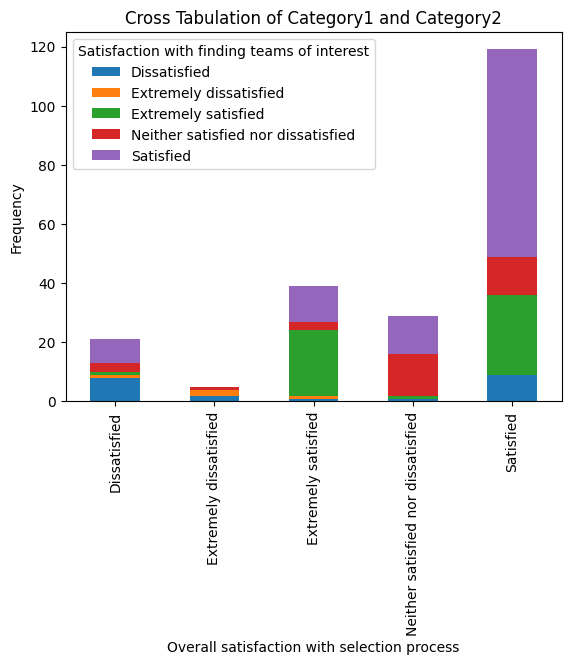

In [47]:
# look at data crosstabed
cross_tab = pd.crosstab(df['Overall satisfaction with selection process'],
                        df['Satisfaction with finding teams of interest'])

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of Category1 and Category2')
plt.xlabel('Overall satisfaction with selection process')
plt.ylabel('Frequency')
plt.show()

In [48]:
# check the dependency of variables
# is satisfaction independent of location
# H0 = satisfaction is independent of location Ha = Satisfaction depends on location

# import the required function
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['menloPark/non-menloPark'], df['Overall satisfaction with selection process'])

# Perform the Chi-squared test
chi, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print('The p-value is', p_value)

The p-value is 0.7413611616086629


# Observation
- Overall satisfaction does not depend on location.

In [49]:
# create function to check all variables
def independece_test(question):
# Create a contingency table
  contingency_table = pd.crosstab(df['menloPark/non-menloPark'], df[question])

# Perform the Chi-squared test
  chi, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
  print('The p-value is', p_value)

In [50]:
independece_test('Satisfaction with finding teams of interest')

The p-value is 0.33833557749738413


In [51]:
independece_test('Satisfaction with responding to to and tracking teams that reach out to you')

The p-value is 0.4532609875727269


In [52]:
independece_test('Satisfaction with Coordinating with your mentor on how to best engage with hiring managers and their teams')

The p-value is 0.9621268089650289


In [53]:
independece_test('satisfaction with The responsiveness of hiring managers that you have reached out to')

The p-value is 0.508630376033559


In [54]:
independece_test('Satisfaction with tracking team selection progress and next steps for hiring managers/teams that you are interacting with')

The p-value is 0.7059588141157133


In [55]:
independece_test('Satisfaction with the level of effort needed to find a team relative to your external experience with finding a job')

The p-value is 0.7403890267088978


In [56]:
independece_test('Satisfaction with the level of transparency and insight into the hiring managers decision throughout the process')

The p-value is 0.720111372322755


In [57]:
independece_test('Satisfaction with the team selection support the Jobs tool provides')

The p-value is 0.20931595940246106


# Observation
- Non of the variables are dependent on location